<a href="https://colab.research.google.com/github/alanrend0n/Boosterblock/blob/main/sample_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=ca2255387cbad3d9e85a3c867dc2cbb65649b12a40605660a76b7fa289327c28
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [29]:
import pandas
import seaborn
import skfuzzy
import numpy
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
datos=None

In [30]:
datos=None
datos=pandas.read_csv('codedsample.csv')
datos

,añonac,estadonac,estadorec,añodef,mesdef,causadef,areapais,genero,edad,diagnostico
0,2005,NUEVO LEON,NUEVO LEON,2005,3,No Identificado,NORTE,M,60+,Enfermedad arterial periférica
1,1932,DISTRITO FEDERAL,DISTRITO FEDERAL,1997,5,infarto agudo de miocardio,DF,H,60+,Infarto agudo de miocardio
2,2006,ZACATECAS,ZACATECAS,2006,2,neoplasia maligna bronquio/pulmón,NORTE,M,45,Cáncer de pulmón
3,2005,GUANAJUATO,GUANAJUATO,2005,5,infarto cerebral,PACÍFICO-BAJÍO,H,60+,Accidente cerebrovascular
4,1959,CHIHUAHUA,CHIHUAHUA,1988,12,infarto agudo de miocardio,NORTE,H,25,Infarto agudo de miocardio
...,...,...,...,...,...,...,...,...,...,...
444607,2007,PUEBLA,PUEBLA,2007,5,DM1,CENTRO,H,10,Diabetes mellitus ID (tipo 1)
444608,2006,MICHOACAN,DISTRITO FEDERAL,2006,1,DM2,DF,M,55,Diabetes mellitus NID (tipo 2)
444609,1920,JALISCO,JALISCO,2003,7,neoplasia maligna de mama,PACÍFICO-BAJÍO,M,60+,Cáncer de mama
444610,1909,OAXACA,OAXACA,1994,8,enfermedad cerebrovascular,SUR,H,60+,Accidente cerebrovascular


In [31]:
datos=pandas.read_csv('sample.csv')
datos

,añonac,estadonac,estadorec,añodef,mesdef,causadef,areapais,genero,edad,diagnostico
0,2005,14,1,2005,3,52,2,1,7,2
1,1932,20,26,1997,5,50,3,0,7,0
2,2006,23,24,2006,2,16,2,1,8,18
3,2005,0,18,2005,5,82,1,0,7,5
4,1959,27,19,1988,12,50,2,0,12,0
...,...,...,...,...,...,...,...,...,...,...
444607,2007,16,11,2007,5,114,4,0,1,6
444608,2006,8,26,2006,1,15,3,1,6,15
444609,1920,28,10,2003,7,57,1,1,7,10
444610,1909,11,15,1994,8,116,0,0,7,5


In [32]:
datos.corr()

,añonac,estadonac,estadorec,añodef,mesdef,causadef,areapais,genero,edad,diagnostico
añonac,1.000000,-0.034404,0.019282,0.583858,0.016196,0.069651,0.017856,-0.016638,0.021035,0.117246
estadonac,-0.034404,1.000000,-0.108469,0.001185,-0.006939,0.002427,-0.033774,-0.010104,-0.030643,-0.033090
estadorec,0.019282,-0.108469,1.000000,-0.012441,0.008162,-0.004692,0.498802,0.013468,0.035527,0.021241
añodef,0.583858,0.001185,-0.012441,1.000000,0.009814,0.164032,-0.037107,0.014139,-0.149072,0.008670
mesdef,0.016196,-0.006939,0.008162,0.009814,1.000000,0.000471,0.007059,-0.008176,-0.001794,0.001565
causadef,0.069651,0.002427,-0.004692,0.164032,0.000471,1.000000,-0.009322,-0.007109,0.017788,-0.499707
areapais,0.017856,-0.033774,0.498802,-0.037107,0.007059,-0.009322,1.000000,0.016748,0.048489,0.024113
genero,-0.016638,-0.010104,0.013468,0.014139,-0.008176,-0.007109,0.016748,1.000000,-0.011657,0.055558
edad,0.021035,-0.030643,0.035527,-0.149072,-0.001794,0.017788,0.048489,-0.011657,1.000000,0.063453
diagnostico,0.117246,-0.033090,0.021241,0.008670,0.001565,-0.499707,0.024113,0.055558,0.063453,1.000000


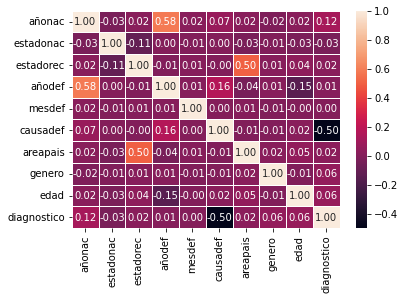

In [33]:
seaborn.heatmap(datos.corr(),annot=True,fmt='.2f',linewidths=0.5)
pyplot.show()

In [34]:
datos=datos.drop(columns=['añonac','estadonac','areapais','diagnostico','añodef'])
datos

,estadorec,mesdef,causadef,genero,edad
0,1,3,52,1,7
1,26,5,50,0,7
2,24,2,16,1,8
3,18,5,82,0,7
4,19,12,50,0,12
...,...,...,...,...,...
444607,11,5,114,0,1
444608,26,1,15,1,6
444609,10,7,57,1,7
444610,15,8,116,0,7


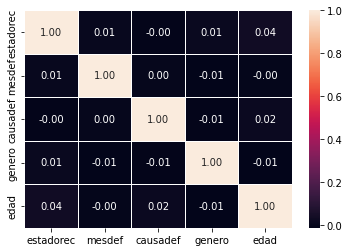

In [35]:
seaborn.heatmap(datos.corr(), annot=True, fmt='.2f', linewidths=0.5) #Misma matriz de correlaciones, pero mejor presentado visualmente
pyplot.show()

In [39]:
X=datos.transpose()
X

,0,1,2,3,4,5,6,7,8,9,...,444602,444603,444604,444605,444606,444607,444608,444609,444610,444611
estadorec,1,26,24,18,19,31,19,12,4,28,...,17,15,10,5,31,11,26,10,15,11
mesdef,3,5,2,5,12,5,9,9,12,7,...,5,7,2,11,7,5,1,7,8,3
causadef,52,50,16,82,50,108,30,52,57,30,...,108,5,50,46,22,114,15,57,116,15
genero,1,0,1,0,0,1,1,1,1,1,...,1,0,0,1,0,0,1,1,0,0
edad,7,7,8,7,12,6,7,7,4,7,...,7,7,4,7,7,1,6,7,7,7


In [40]:
centros=2
centroides,u,u0,distancia,jm,iteraciones,fpc=skfuzzy.cluster.cmeans(X,centros,2,error=0.005,maxiter=1000)

In [41]:
cT=centroides
cT

array([[16.365893  ,  6.45725764, 94.06002506,  0.46773149,  7.17017204],
       [16.12637431,  6.4410047 , 28.49721984,  0.48770443,  6.8444729 ]])

In [42]:
cT=pandas.DataFrame(cT)
cT

,0,1,2,3,4
0,16.365893,6.457258,94.060025,0.467731,7.170172
1,16.126374,6.441005,28.497220,0.487704,6.844473


In [43]:
cT=cT.set_axis(datos.axes[1],axis=1) #Mter el nombre de las columnas en vez de los numéros
cT

,estadorec,mesdef,causadef,genero,edad
0,16.365893,6.457258,94.060025,0.467731,7.170172
1,16.126374,6.441005,28.497220,0.487704,6.844473


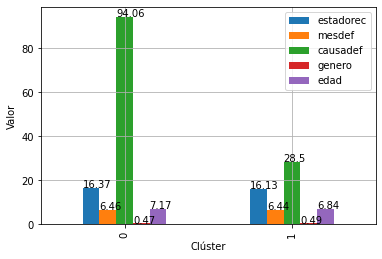

In [44]:
ax=cT.plot.bar()
ax.set_xlabel('Clúster')
ax.set_ylabel('Valor')
ax.grid(True)
ax.legend(bbox_to_anchor=(1,1))
for p in ax.patches:
  ax.annotate(str(numpy.round(p.get_height(),decimals=2)),(p.get_x(),p.get_height()*1.005))